In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import os

In [8]:

# Define the folder containing your .tif files
data_folder = "F:/classification/Annaual classification maps"  # Replace with your actual folder path

# Define the file naming pattern
years = range(2018, 2025)  # Adjust years as needed
file_template = "Forest_classes_{}.tif"

# Function to load classified images
def load_classified_image(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
    return data

# Function to calculate proportions of each class
def calculate_proportions(image):
    unique, counts = np.unique(image, return_counts=True)
    total = np.sum(counts)
    proportions = {k: counts[unique.tolist().index(k)] / total for k in unique}
    return [proportions.get(i, 0) for i in range(3)]  # Ensure 0, 1, 2 proportions

# Load images and calculate proportions
yearly_proportions = {}
for year in years:
    file_path = os.path.join(data_folder, file_template.format(year))
    if os.path.exists(file_path):
        classified_image = load_classified_image(file_path)
        yearly_proportions[year] = calculate_proportions(classified_image)
    else:
        print(f"File not found: {file_path}")
        yearly_proportions[year] = [0, 0, 0]  # Default to zero proportions

# Enhanced doughnut chart creation
def plot_doughnut_chart(yearly_proportions, output_path="doughnut_charts_publication.png"):
    num_years = len(yearly_proportions)
    ncols = 4  # Number of columns in the grid
    nrows = (num_years + ncols - 1) // ncols  # Calculate rows dynamically
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, nrows * 4), dpi=300)
    axes = axes.flatten()
    
    # Shared styling for all charts
    colors = ['#d7191c', '#fdae61', '#2b83ba']
    labels = ["Bare Soil", "Early Regrowth", "Mature Regrowth"]
    
    for idx, (year, proportions) in enumerate(yearly_proportions.items()):
        ax = axes[idx]
        wedges, texts, autotexts = ax.pie(
            proportions, 
            labels=labels, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=colors, 
            wedgeprops={'width': 0.3, 'edgecolor': 'white'}
        )
        ax.set_title(f"{year}", fontsize=16, fontweight='bold')
        
        # Beautify percentage labels
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_fontsize(8.5)
            autotext.set_fontweight('bold')
    
    # Hide unused subplots
    for ax in axes[num_years:]:
        ax.axis('off')

    # Add a shared legend below the plots
    fig.legend(
        handles=wedges, labels=labels, loc='lower center', 
        ncol=3, fontsize=14, frameon=False
    )
    
    # Add a shared title
    fig.suptitle("Proportion of Classes Over Time (2018–2024)", fontsize=18, fontweight='bold')
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Leave space for the legend and title
    plt.show()
    plt.savefig(output_path, bbox_inches='tight')  # Save the figure
    print(f"Doughnut charts saved to: {output_path}")
    plt.close(fig)  # Close the figure to free memory

# Save the doughnut chart to a file
output_file = "doughnut_charts_publication.png"  # Change this to your desired file name or format
plot_doughnut_chart(yearly_proportions, output_path=output_file)


Doughnut charts saved to: doughnut_charts_publication.png


Stacked area chart saved to: stacked_area_chart_forest_only.png


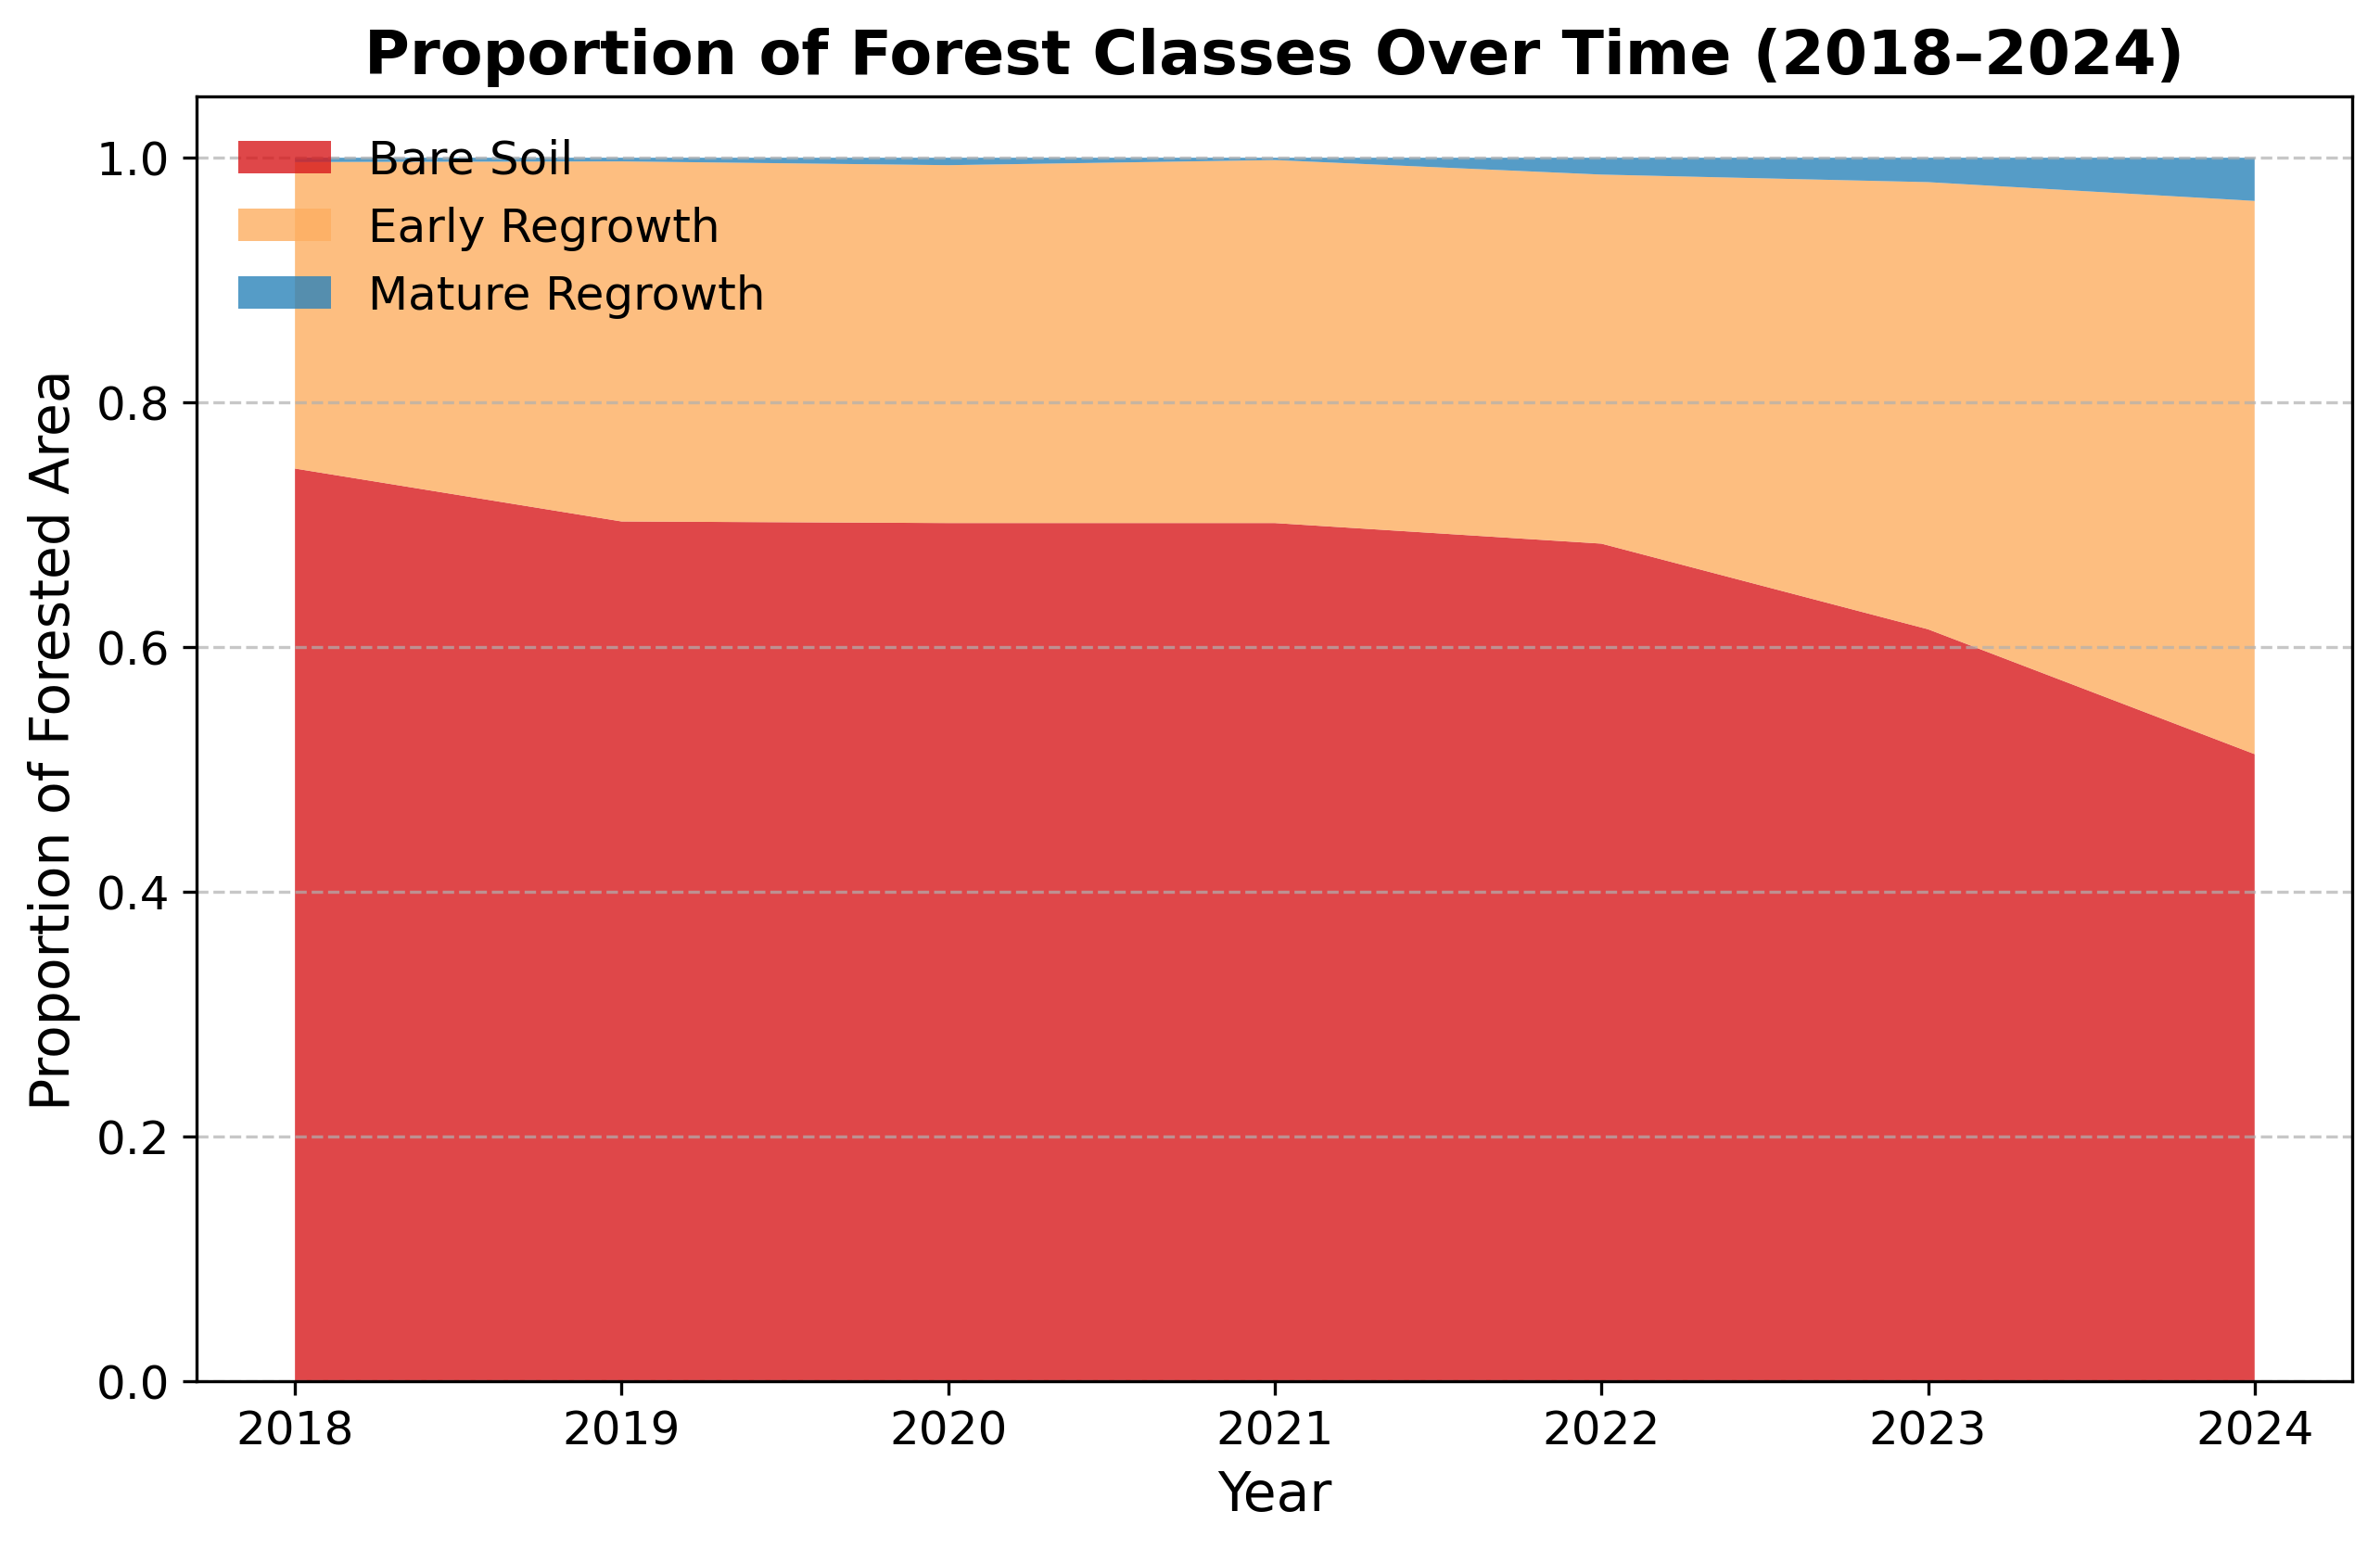

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import os

# Define the folder containing your .tif files
data_folder = "E:/classification/Annaual classification maps"  # Replace with your actual folder path

# Define the file naming pattern
years = range(2018, 2025)  # Adjust years as needed
file_template = "Forest_classes_{}_.tif"

# Function to load classified images
def load_classified_image(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
    return data

# Function to calculate proportions relative to forested area
def calculate_forest_proportions(image):
    forest_mask = (image == 0) | (image == 1) | (image == 2)  # Include only forest classes
    total_forest_area = np.sum(forest_mask)  # Total forested pixels
    proportions = {}
    for cls in [0, 1, 2]:  # Forest classes: 0 (Bare Soil), 1 (Early Regrowth), 2 (Mature Regrowth)
        cls_area = np.sum(image == cls)
        proportions[cls] = cls_area / total_forest_area if total_forest_area > 0 else 0
    return [proportions.get(cls, 0) for cls in [0, 1, 2]]  # Ensure consistent order

# Load images and calculate proportions
yearly_proportions = {}
for year in years:
    file_path = os.path.join(data_folder, file_template.format(year))
    if os.path.exists(file_path):
        classified_image = load_classified_image(file_path)
        yearly_proportions[year] = calculate_forest_proportions(classified_image)
    else:
        print(f"File not found: {file_path}")
        yearly_proportions[year] = [0, 0, 0]  # Default to zero proportions

# Prepare data for stacked area chart
years_list = list(yearly_proportions.keys())
proportions = np.array(list(yearly_proportions.values()))  # Convert to NumPy array for easier slicing
bare_soil = proportions[:, 0]  # First column is bare soil
early_regrowth = proportions[:, 1]  # Second column is early regrowth
mature_regrowth = proportions[:, 2]  # Third column is mature regrowth

# Stacked area chart
plt.figure(figsize=(10, 6), dpi=300)
plt.stackplot(
    years_list, 
    bare_soil, early_regrowth, mature_regrowth, 
    labels=["Bare Soil", "Early Regrowth", "Mature Regrowth"], 
    colors=['#d7191c', '#fdae61', '#2b83ba'], 
    alpha=0.8
)

# Add labels, legend, and grid
plt.title("Proportion of Forest Classes Over Time (2018–2024)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Proportion of Forested Area", fontsize=14)  # Updated y-axis label
plt.legend(loc='upper left', fontsize=12, frameon=False)
plt.xticks(years_list, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the chart
output_file = "stacked_area_chart_forest_only.png"
plt.savefig(output_file, bbox_inches='tight')
print(f"Stacked area chart saved to: {output_file}")

# Show the chart
plt.show()


Stacked area chart saved to: stacked_area_chart_disturbed_only.png


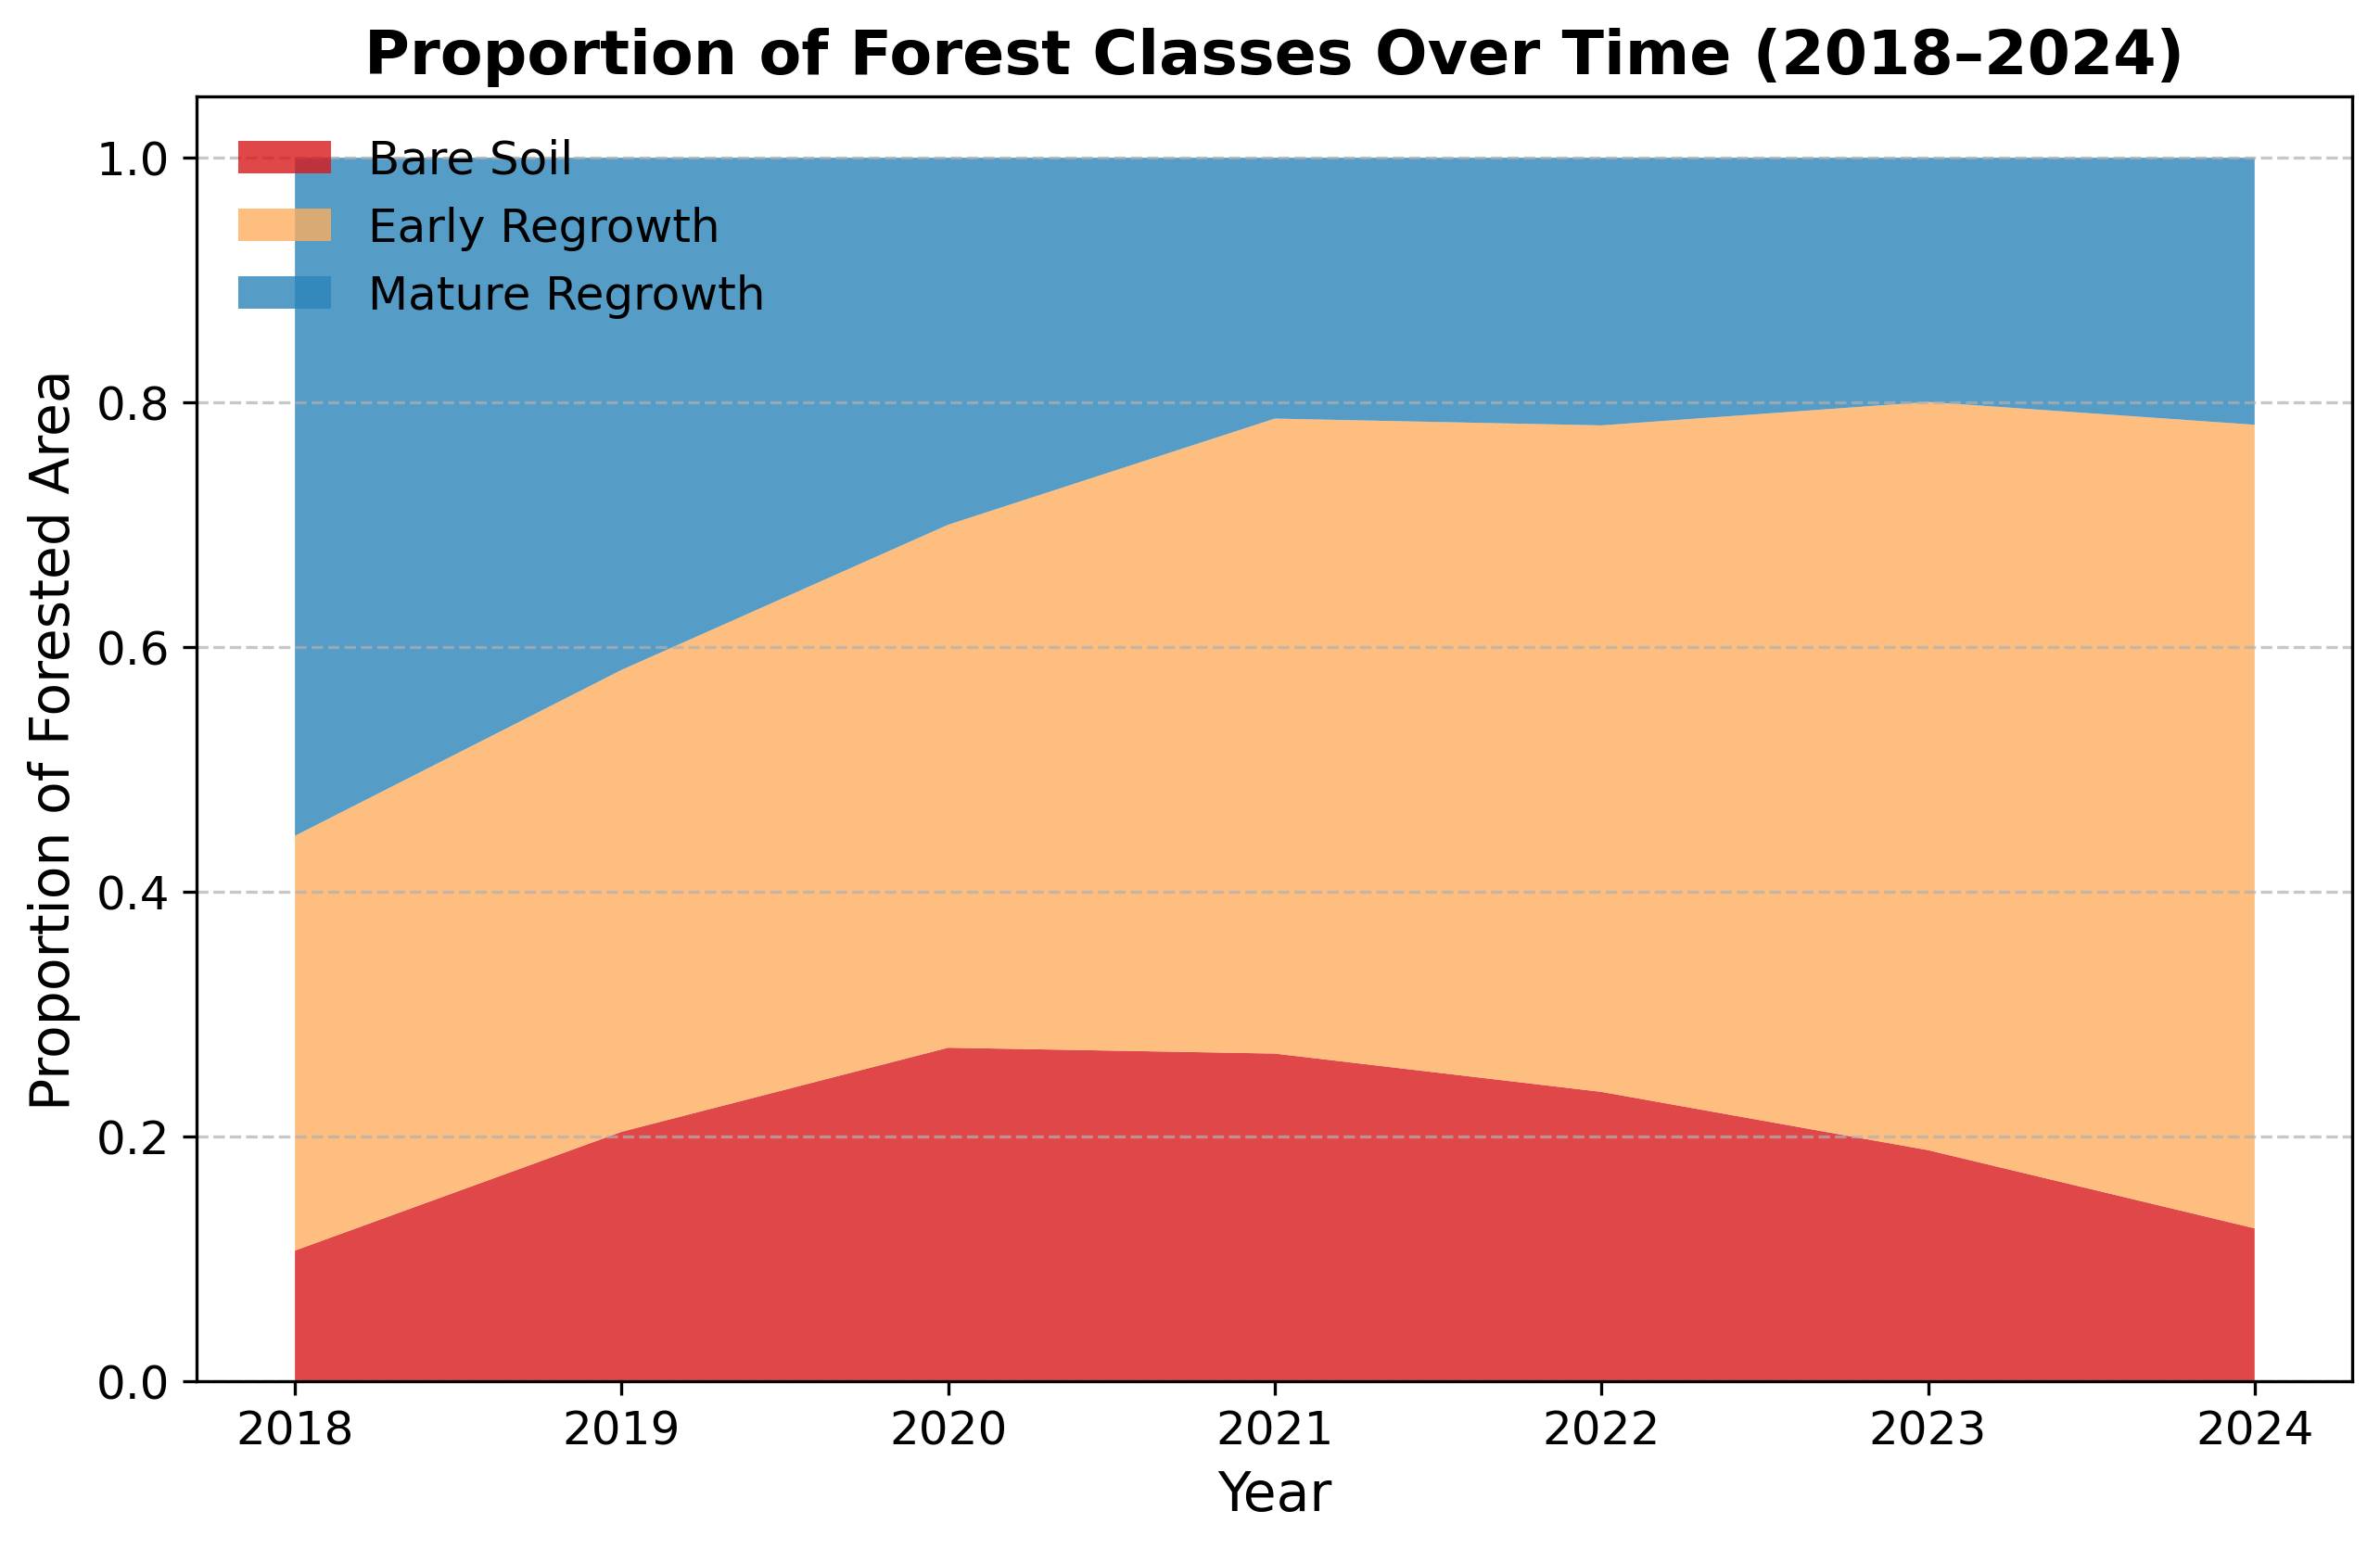

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import os

# Define the folder containing your .tif files
data_folder = "E:/classification/Annaual classification maps"  # Replace with your actual folder path

# Define the file naming pattern
years = range(2018, 2025)  # Adjust years as needed
file_template = "Forest_classes_{}.tif"

# Function to load classified images
def load_classified_image(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
    return data

# Function to calculate proportions relative to forested area
def calculate_forest_proportions(image):
    forest_mask = (image == 0) | (image == 1) | (image == 2)  # Include only forest classes
    total_forest_area = np.sum(forest_mask)  # Total forested pixels
    proportions = {}
    for cls in [0, 1, 2]:  # Forest classes: 0 (Bare Soil), 1 (Early Regrowth), 2 (Mature Regrowth)
        cls_area = np.sum(image == cls)
        proportions[cls] = cls_area / total_forest_area if total_forest_area > 0 else 0
    return [proportions.get(cls, 0) for cls in [0, 1, 2]]  # Ensure consistent order

# Load images and calculate proportions
yearly_proportions = {}
for year in years:
    file_path = os.path.join(data_folder, file_template.format(year))
    if os.path.exists(file_path):
        classified_image = load_classified_image(file_path)
        yearly_proportions[year] = calculate_forest_proportions(classified_image)
    else:
        print(f"File not found: {file_path}")
        yearly_proportions[year] = [0, 0, 0]  # Default to zero proportions

# Prepare data for stacked area chart
years_list = list(yearly_proportions.keys())
proportions = np.array(list(yearly_proportions.values()))  # Convert to NumPy array for easier slicing
bare_soil = proportions[:, 0]  # First column is bare soil
early_regrowth = proportions[:, 1]  # Second column is early regrowth
mature_regrowth = proportions[:, 2]  # Third column is mature regrowth

# Stacked area chart
plt.figure(figsize=(10, 6), dpi=300)
plt.stackplot(
    years_list, 
    bare_soil, early_regrowth, mature_regrowth, 
    labels=["Bare Soil", "Early Regrowth", "Mature Regrowth"], 
    colors=['#d7191c', '#fdae61', '#2b83ba'], 
    alpha=0.8
)

# Add labels, legend, and grid
plt.title("Proportion of Forest Classes Over Time (2018–2024)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Proportion of Forested Area", fontsize=14)  # Updated y-axis label
plt.legend(loc='upper left', fontsize=12, frameon=False)
plt.xticks(years_list, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the chart
output_file = "stacked_area_chart_disturbed_only.png"
plt.savefig(output_file, bbox_inches='tight')
print(f"Stacked area chart saved to: {output_file}")

# Show the chart
plt.show()


Line graph saved to: line_graph_class_areas.png


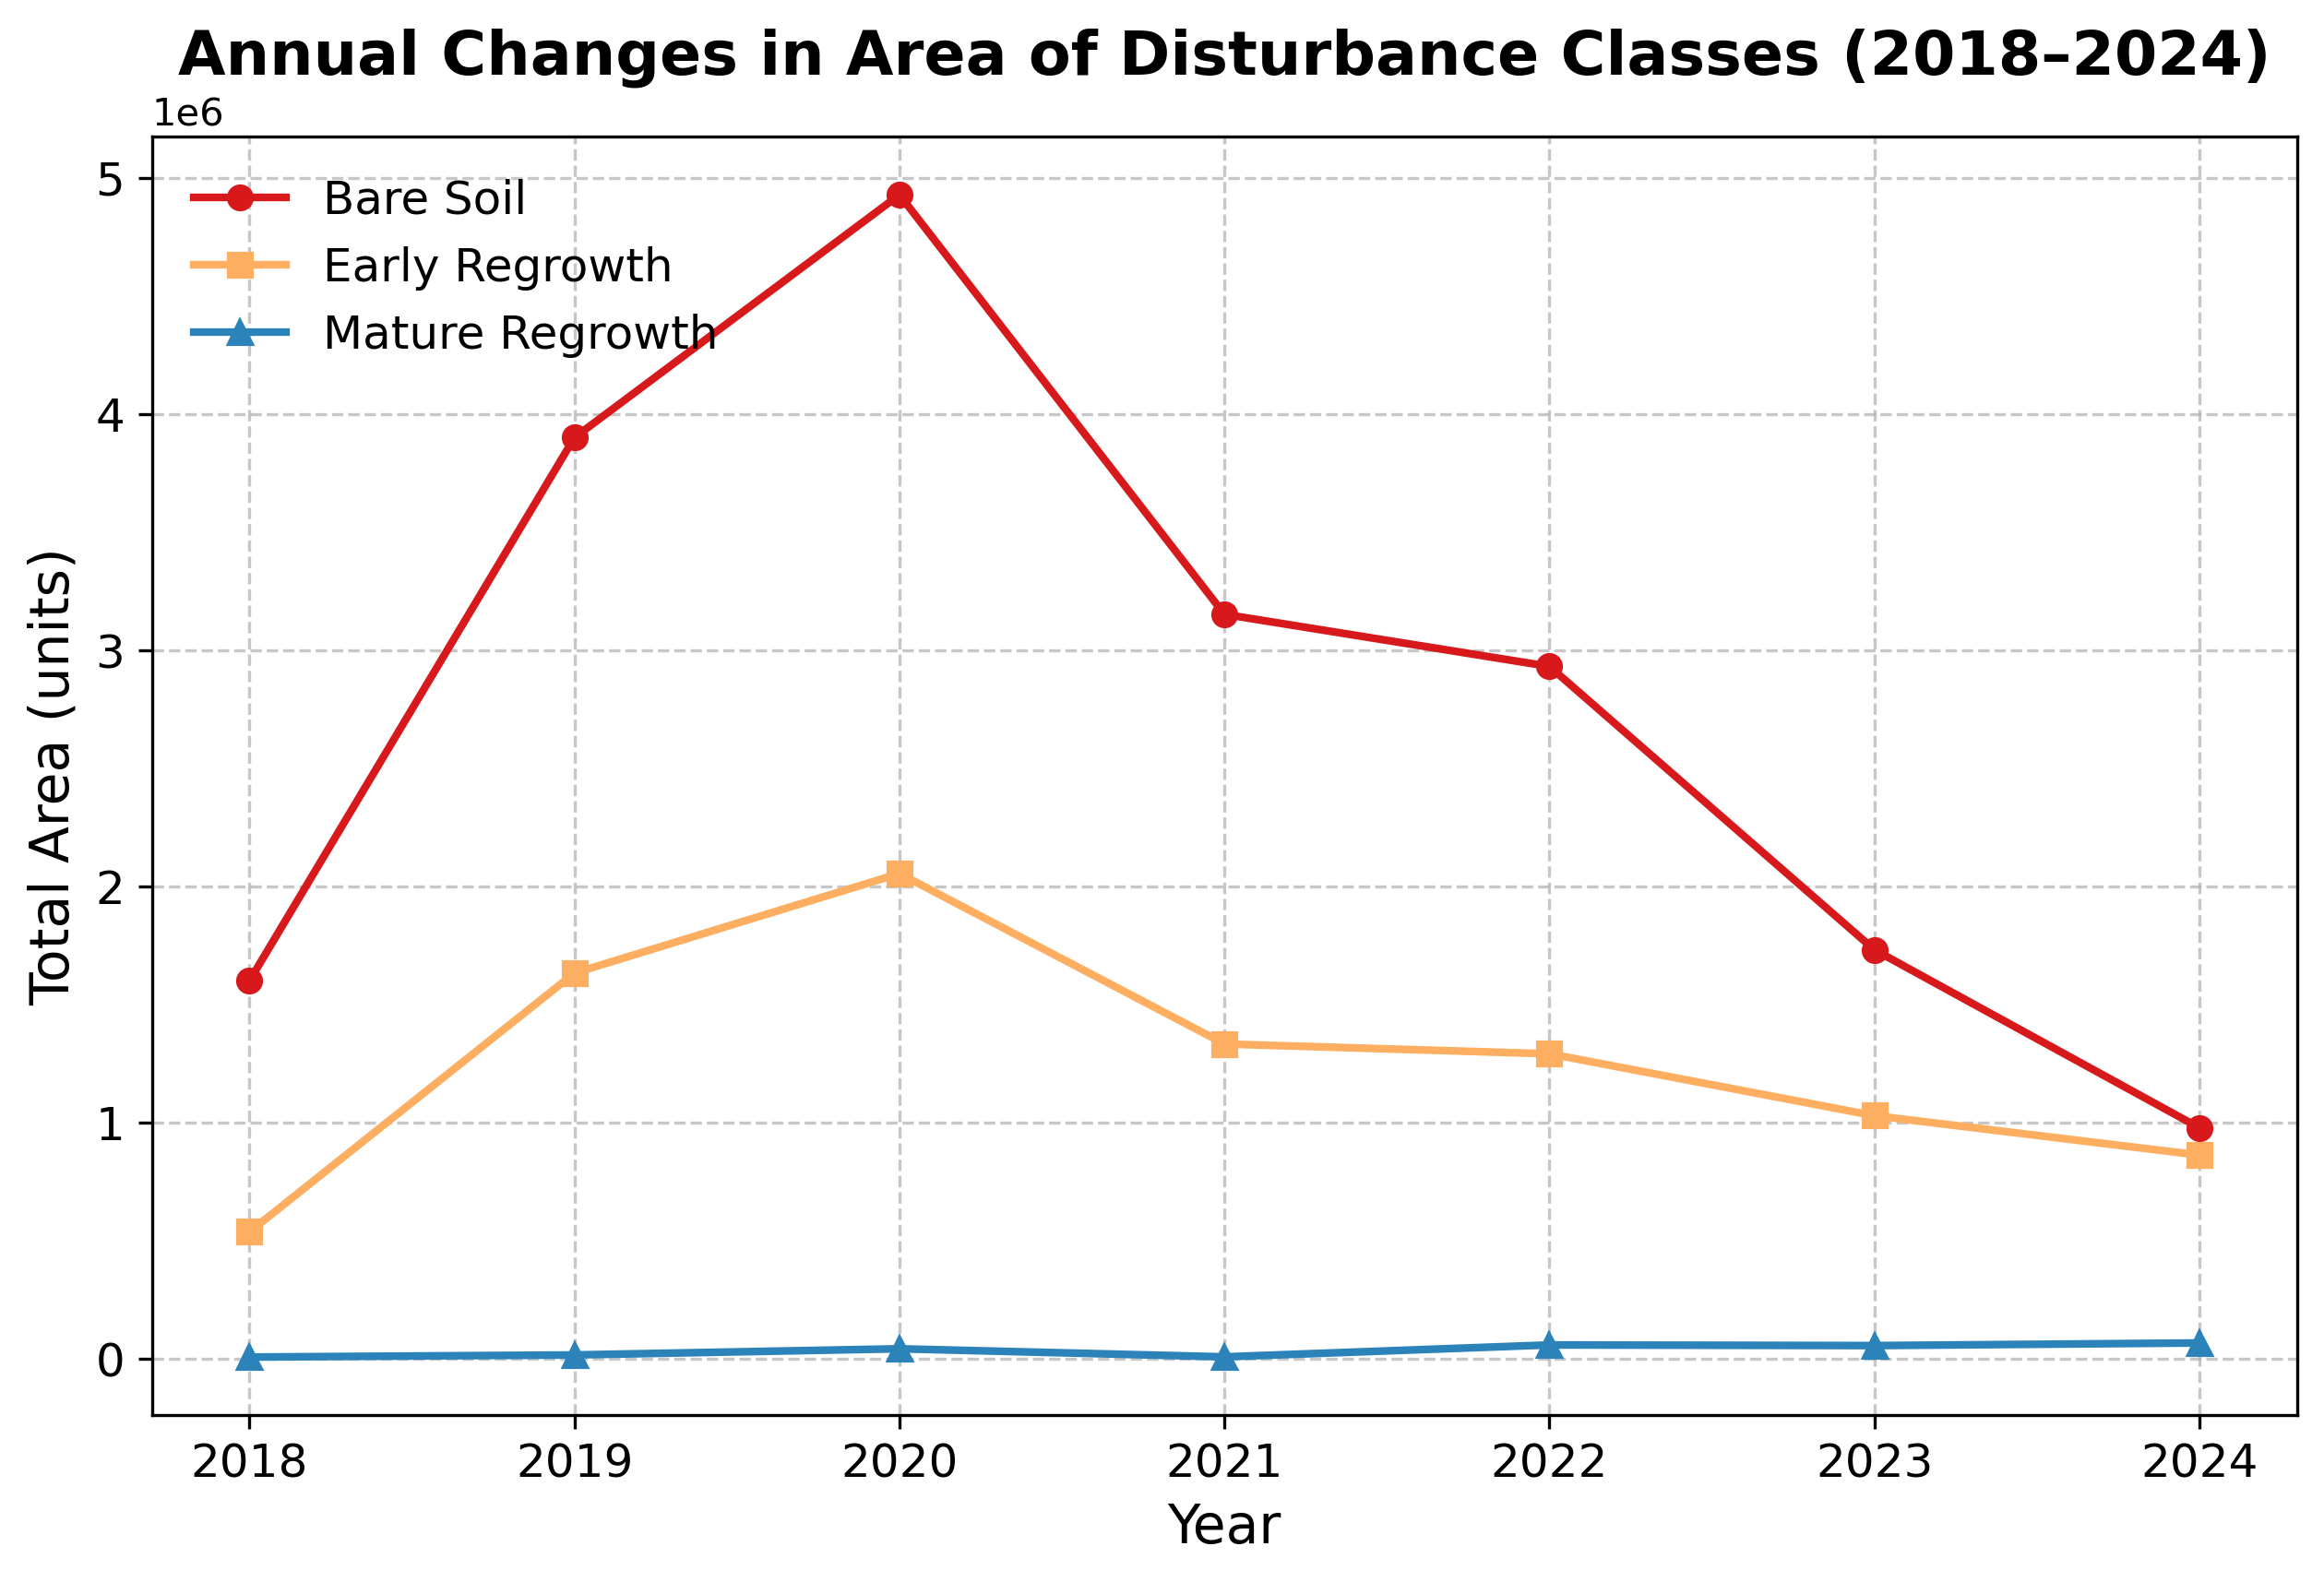

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import os

# Define the folder containing your .tif files
data_folder = "E:/classification/Annaual classification maps"  # Replace with your actual folder path

# Define the file naming pattern
years = range(2018, 2025)  # Adjust years as needed
file_template = "Forest_classes_{}_.tif"

# Function to load classified images
def load_classified_image(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
    return data

# Function to calculate total area for each class
def calculate_areas(image, pixel_area=1):
    unique, counts = np.unique(image, return_counts=True)
    areas = {k: counts[unique.tolist().index(k)] * pixel_area for k in unique}
    return [areas.get(i, 0) for i in range(3)]  # Ensure areas for 0, 1, 2

# Load images and calculate areas
pixel_area = 1  # Change this to reflect the real-world area of each pixel (e.g., hectares)
yearly_areas = {}
for year in years:
    file_path = os.path.join(data_folder, file_template.format(year))
    if os.path.exists(file_path):
        classified_image = load_classified_image(file_path)
        yearly_areas[year] = calculate_areas(classified_image, pixel_area=pixel_area)
    else:
        print(f"File not found: {file_path}")
        yearly_areas[year] = [0, 0, 0]  # Default to zero areas

# Prepare data for the line graph
years_list = list(yearly_areas.keys())
areas = np.array(list(yearly_areas.values()))  # Convert to NumPy array for easier slicing
bare_soil_area = areas[:, 0]  # First column is bare soil
early_regrowth_area = areas[:, 1]  # Second column is early regrowth
mature_regrowth_area = areas[:, 2]  # Third column is mature regrowth

# Line graph
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(years_list, bare_soil_area, label="Bare Soil", color='#d7191c', marker='o', linewidth=2)
plt.plot(years_list, early_regrowth_area, label="Early Regrowth", color='#fdae61', marker='s', linewidth=2)
plt.plot(years_list, mature_regrowth_area, label="Mature Regrowth", color='#2b83ba', marker='^', linewidth=2)

# Add labels, legend, and grid
plt.title("Annual Changes in Area of Disturbance Classes (2018–2024)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Area (units)", fontsize=14)  # Change "units" to actual units, e.g., hectares
plt.legend(loc='upper left', fontsize=12, frameon=False)
plt.xticks(years_list, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Save the chart
output_file = "line_graph_class_areas.png"
plt.savefig(output_file, bbox_inches='tight')
print(f"Line graph saved to: {output_file}")

# Show the chart
plt.show()


Line graph saved to: line_graph_class_areas_sum_based.png


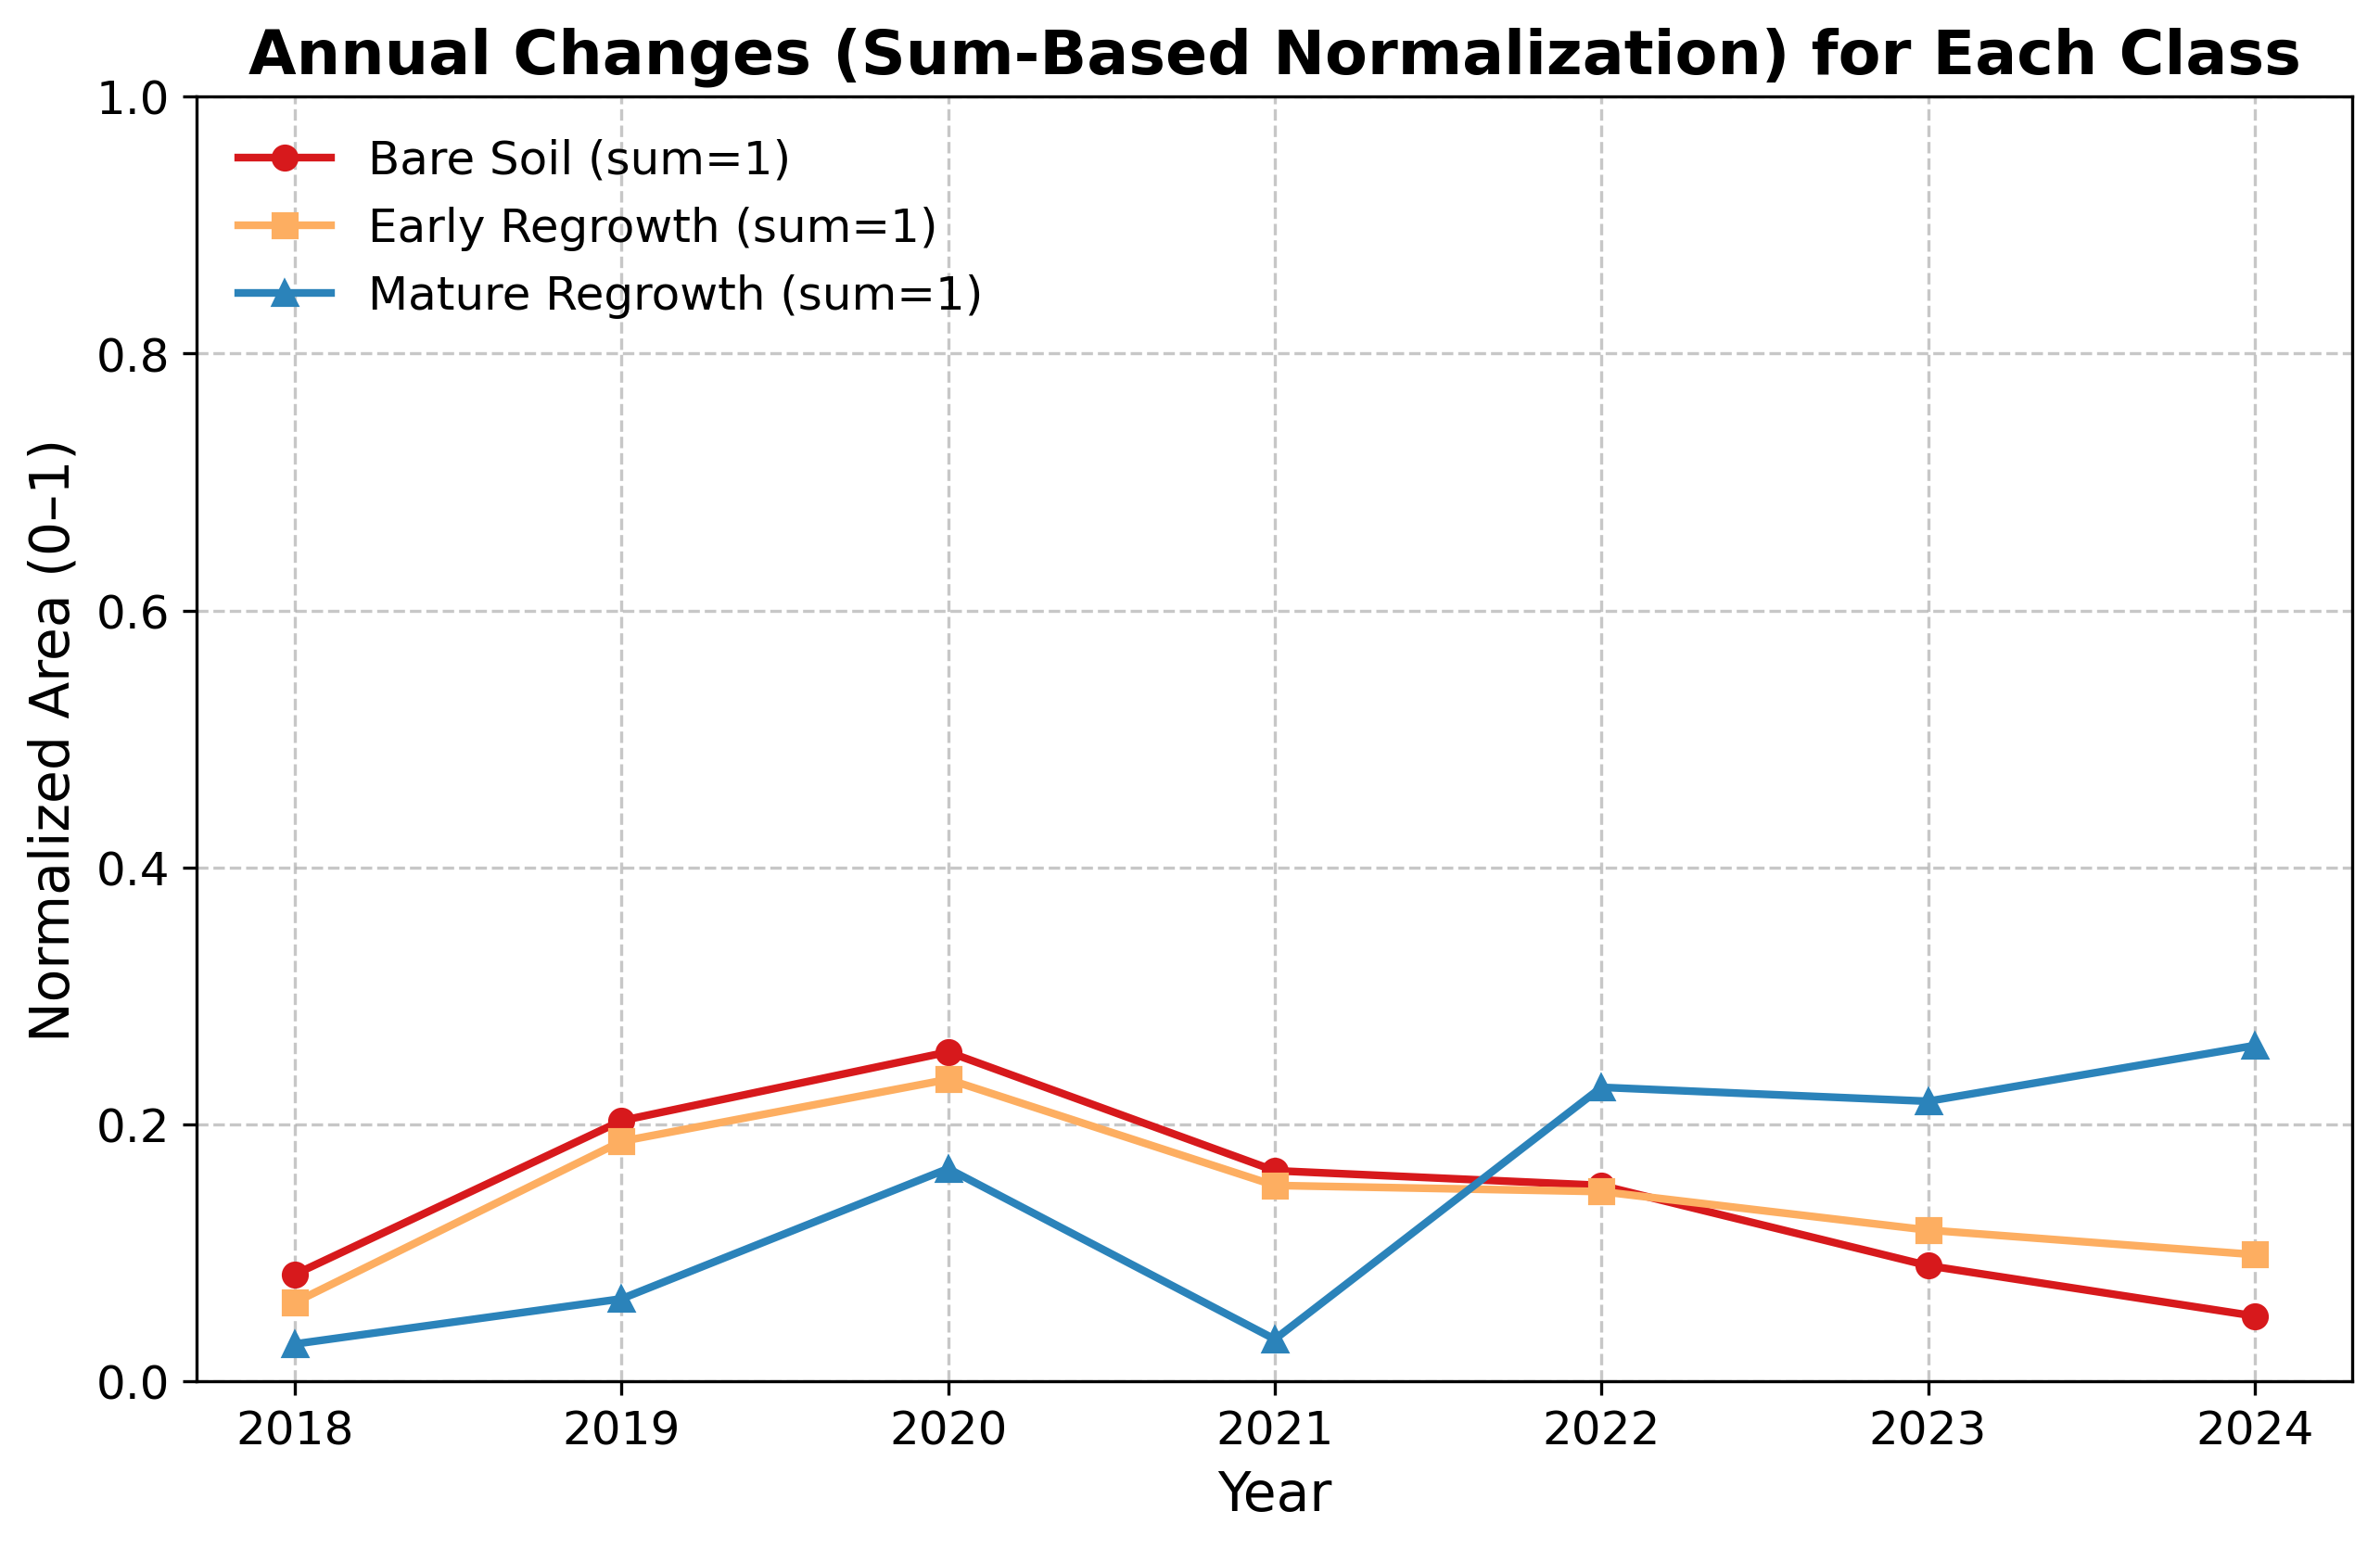

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import os

# ---------------------------------------------
# 1) LOAD AND PREPARE THE DATA
# ---------------------------------------------

# Folder containing your .tif files
data_folder = "E:/classification/Annaual classification maps"  # <-- Replace with your folder path

# File naming pattern
years = range(2018, 2025)  # Adjust the range as needed (2018 to 2024 inclusive)
file_template = "Forest_classes_{}_.tif"

# Function to read the first band from a .tif file
def load_classified_image(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read only the first band
    return data

# Function to calculate total area for each class
def calculate_areas(image, pixel_area=1):
    """
    image: 2D NumPy array of classification labels (0,1,2)
    pixel_area: area covered by each pixel (e.g., 1 hectare)
    Returns a list [area_class0, area_class1, area_class2]
    """
    unique, counts = np.unique(image, return_counts=True)
    areas_dict = {cls: cnt * pixel_area for cls, cnt in zip(unique, counts)}
    # Return areas for classes 0,1,2 in that order, defaulting to 0 if missing
    return [areas_dict.get(i, 0) for i in range(3)]

# Load images and store areas for each year
pixel_area = 1  # Change if each pixel covers more than 1 (e.g., 1 hectare)
yearly_areas = {}
for year in years:
    file_path = os.path.join(data_folder, file_template.format(year))
    if os.path.exists(file_path):
        classified_image = load_classified_image(file_path)
        yearly_areas[year] = calculate_areas(classified_image, pixel_area=pixel_area)
    else:
        print(f"File not found: {file_path}")
        yearly_areas[year] = [0, 0, 0]  # If file is missing, default to zero

# Convert dictionary to lists/arrays for easier plotting
years_list = list(yearly_areas.keys())  # e.g., [2018, 2019, 2020, ...]
areas = np.array(list(yearly_areas.values())) # shape: (num_years, 3)
# columns: [Bare Soil, Early Regrowth, Mature Regrowth]
bare_soil_area = areas[:, 0]
early_regrowth_area = areas[:, 1]
mature_regrowth_area = areas[:, 2]

# ---------------------------------------------
# 2) SUM-BASED NORMALIZATION
# ---------------------------------------------
# Each class is normalized such that its sum across all years = 1
bare_total = np.sum(bare_soil_area)
early_total = np.sum(early_regrowth_area)
mature_total = np.sum(mature_regrowth_area)

# Avoid division by zero
if bare_total != 0:
    bare_normalized = bare_soil_area / bare_total
else:
    bare_normalized = np.zeros_like(bare_soil_area)

if early_total != 0:
    early_normalized = early_regrowth_area / early_total
else:
    early_normalized = np.zeros_like(early_regrowth_area)

if mature_total != 0:
    mature_normalized = mature_regrowth_area / mature_total
else:
    mature_normalized = np.zeros_like(mature_regrowth_area)

# ---------------------------------------------
# 3) PLOT THE RESULTS
# ---------------------------------------------
plt.figure(figsize=(10, 6), dpi=300)

plt.plot(years_list, bare_normalized, label="Bare Soil (sum=1)",
         color='#d7191c', marker='o', linewidth=2)
plt.plot(years_list, early_normalized, label="Early Regrowth (sum=1)",
         color='#fdae61', marker='s', linewidth=2)
plt.plot(years_list, mature_normalized, label="Mature Regrowth (sum=1)",
         color='#2b83ba', marker='^', linewidth=2)

plt.title("Annual Changes (Sum-Based Normalization) for Each Class", 
          fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Normalized Area (0–1)", fontsize=14)
plt.legend(loc='upper left', fontsize=12, frameon=False)
plt.xticks(years_list, fontsize=12)
plt.yticks(np.linspace(0, 1, 6), fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Save the figure
output_file = "line_graph_class_areas_sum_based.png"
plt.savefig(output_file, bbox_inches='tight')
print(f"Line graph saved to: {output_file}")

# Display the plot
plt.show()


Sankey diagram saved to: F:/classification/Annaual classification maps/sankey_transitions_output.html


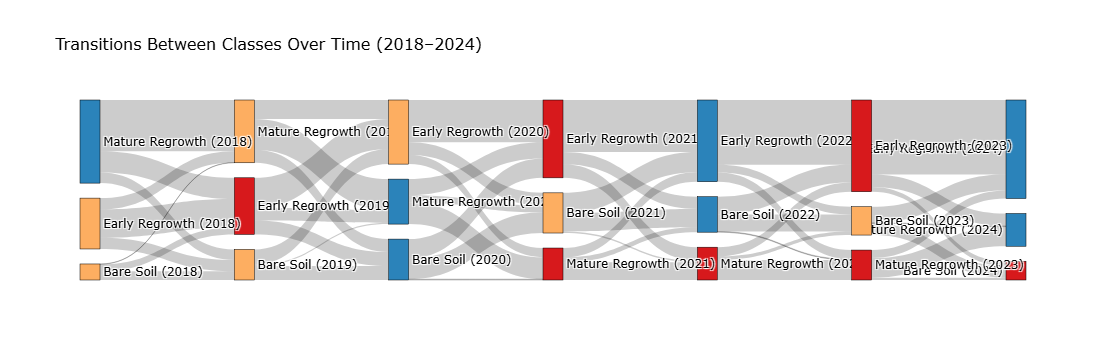

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import plotly

# Define your data folder
data_folder =  "F:/classification/Annaual classification maps"  # Replace with your actual folder path

# Define the file naming pattern
years = range(2018, 2025)  # Adjust years as needed
file_template = "Forest_classes_{}.tif"

# Function to load classified images
def load_classified_image(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
    return data

# Function to calculate transitions between two years
def calculate_transitions(image1, image2):
    transition_counts = np.zeros((3, 3), dtype=int)  # Transition matrix (3x3 for classes 0, 1, 2)
    for from_class in range(3):
        for to_class in range(3):
            transition_counts[from_class, to_class] = np.sum((image1 == from_class) & (image2 == to_class))
    return transition_counts

# Load images and calculate transitions
transitions = []
previous_image = None
for year in years:
    file_path = os.path.join(data_folder, file_template.format(year))
    if os.path.exists(file_path):
        current_image = load_classified_image(file_path)
        if previous_image is not None:
            transitions.append(calculate_transitions(previous_image, current_image))
        previous_image = current_image
    else:
        print(f"File not found: {file_path}")

# Aggregate transitions into a single DataFrame
sources = []
targets = []
values = []
labels = ["Bare Soil", "Early Regrowth", "Mature Regrowth"]

for year_index, transition in enumerate(transitions):
    year_from = years[year_index]
    year_to = years[year_index + 1]
    for from_class in range(3):
        for to_class in range(3):
            sources.append(f"{labels[from_class]} ({year_from})")
            targets.append(f"{labels[to_class]} ({year_to})")
            values.append(transition[from_class, to_class])

transition_data = pd.DataFrame({"Source": sources, "Target": targets, "Value": values})

# Plot Sankey Diagram
from plotly import graph_objects as go

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(set(sources + targets)),  # Unique nodes
        color=["#d7191c", "#fdae61", "#2b83ba"] * len(years)  # Repeat colors for each year
    ),
    link=dict(
        source=[list(set(sources + targets)).index(src) for src in transition_data["Source"]],
        target=[list(set(sources + targets)).index(tgt) for tgt in transition_data["Target"]],
        value=transition_data["Value"]
    )
))

fig.update_layout(
    title_text="Transitions Between Classes Over Time (2018–2024)",
    font=dict(size=12, color='black'),
    title_font_size=16
)

# Save and show
output_file = "F:/classification/Annaual classification maps/sankey_transitions_output.html"

fig.write_html(output_file)
print(f"Sankey diagram saved to: {output_file}")
fig.show()


Sankey diagram saved as sankey_transitions_static.png


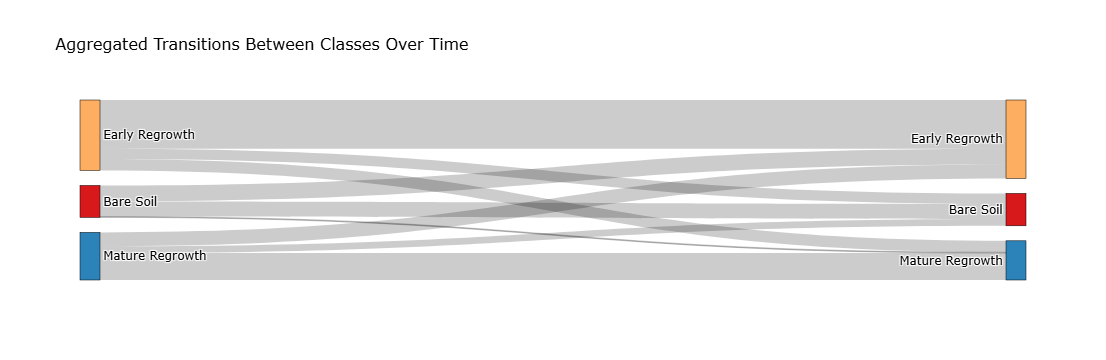

In [5]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import os

# Define your data folder and file template
data_folder = "D:/classification/Annaual classification maps"  # Replace with your actual folder path
years = range(2018, 2025)  # Adjust years as needed
file_template = "Forest_classes_{}.tif"

# Function to load classified images
def load_classified_image(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
    return data

# Function to calculate transitions between two years
def calculate_transitions(image1, image2):
    transition_counts = np.zeros((3, 3), dtype=int)  # Transition matrix (3x3 for classes 0, 1, 2)
    for from_class in range(3):
        for to_class in range(3):
            transition_counts[from_class, to_class] = np.sum((image1 == from_class) & (image2 == to_class))
    return transition_counts

# Load images and calculate transitions
transitions = []
previous_image = None
for year in years:
    file_path = os.path.join(data_folder, file_template.format(year))
    if os.path.exists(file_path):
        current_image = load_classified_image(file_path)
        if previous_image is not None:
            transitions.append(calculate_transitions(previous_image, current_image))
        previous_image = current_image
    else:
        print(f"File not found: {file_path}")

# Aggregate transitions for visualization
aggregate_transition = np.zeros((3, 3), dtype=int)
for transition in transitions:
    aggregate_transition += transition

# Define labels for the nodes
labels = ["Bare Soil", "Early Regrowth", "Mature Regrowth"]

# Prepare data for the Sankey diagram
sources = []
targets = []
values = []

for from_class in range(3):
    for to_class in range(3):
        if aggregate_transition[from_class, to_class] > 0:  # Ignore zero flows
            sources.append(from_class)
            targets.append(to_class + 3)  # Offset target nodes to differentiate years
            values.append(aggregate_transition[from_class, to_class])

# Define the node labels and colors
node_labels = labels + labels  # Add labels for both source and target nodes
node_colors = ["#d7191c", "#fdae61", "#2b83ba"] * 2  # Repeat colors for clarity

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(
    title_text="Aggregated Transitions Between Classes Over Time",
    font=dict(size=12, color='black'),
    title_font_size=16
)

# Save the chart as a static PNG
fig.write_image("sankey_transitions_static.png", width=1200, height=800)
print("Sankey diagram saved as sankey_transitions_static.png")

# Show the Sankey diagram
fig.show()


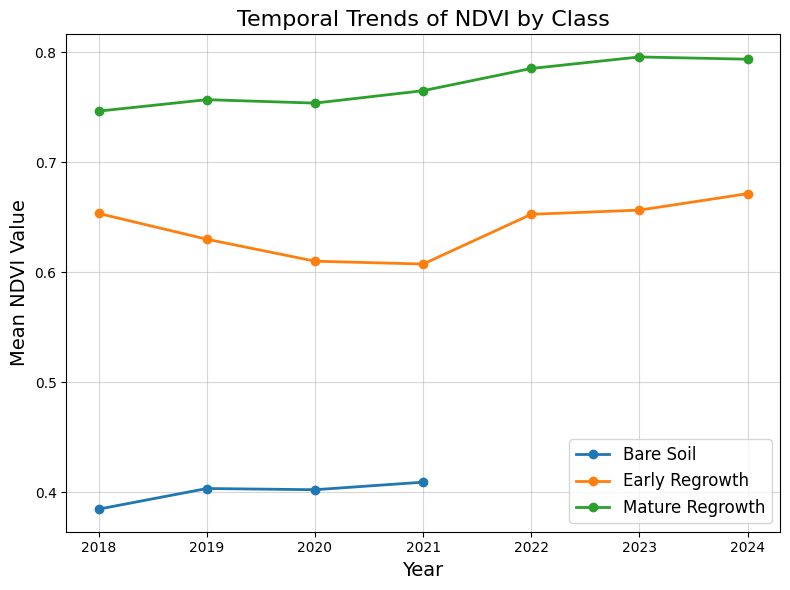

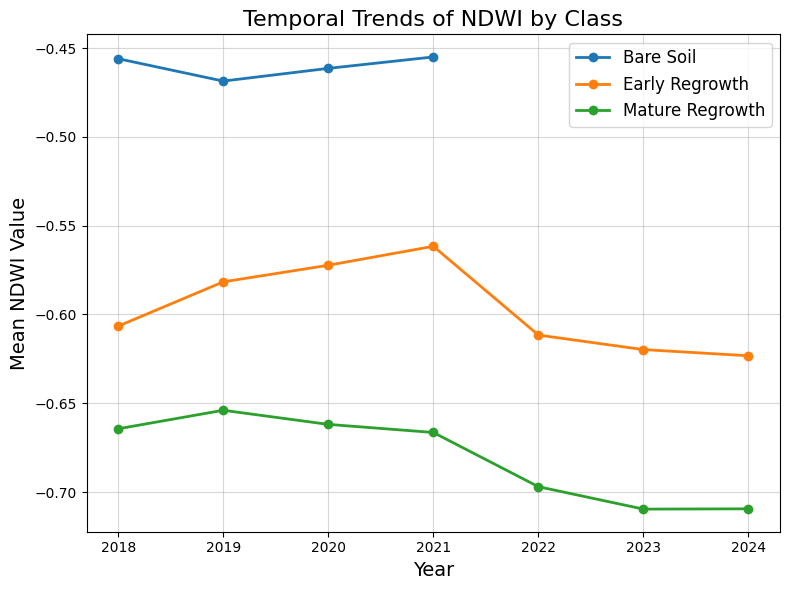

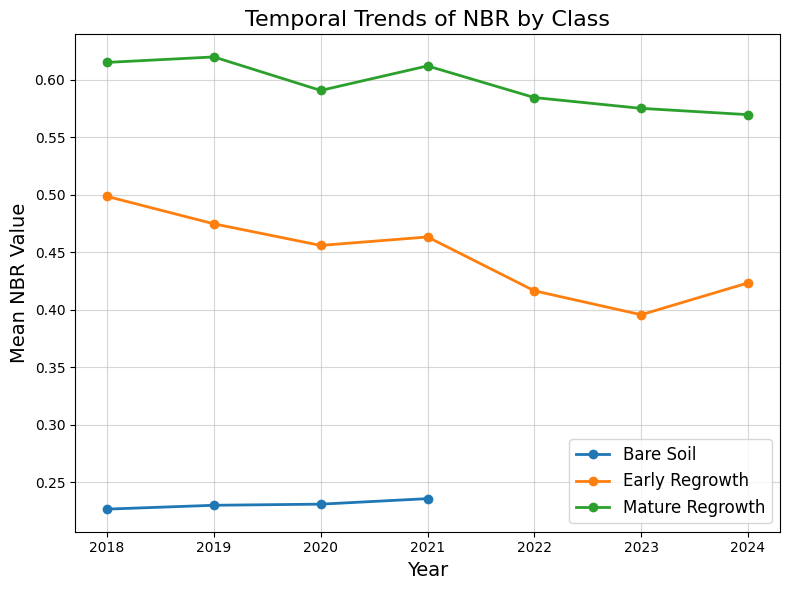

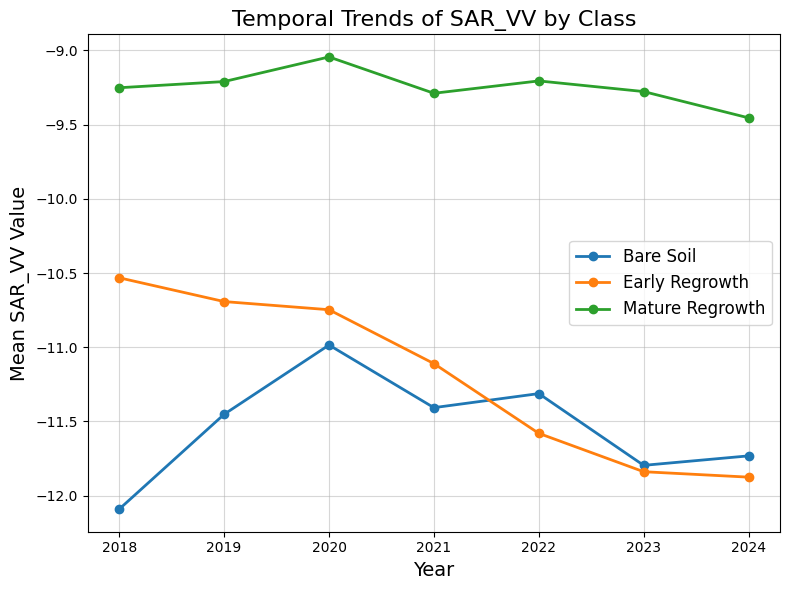

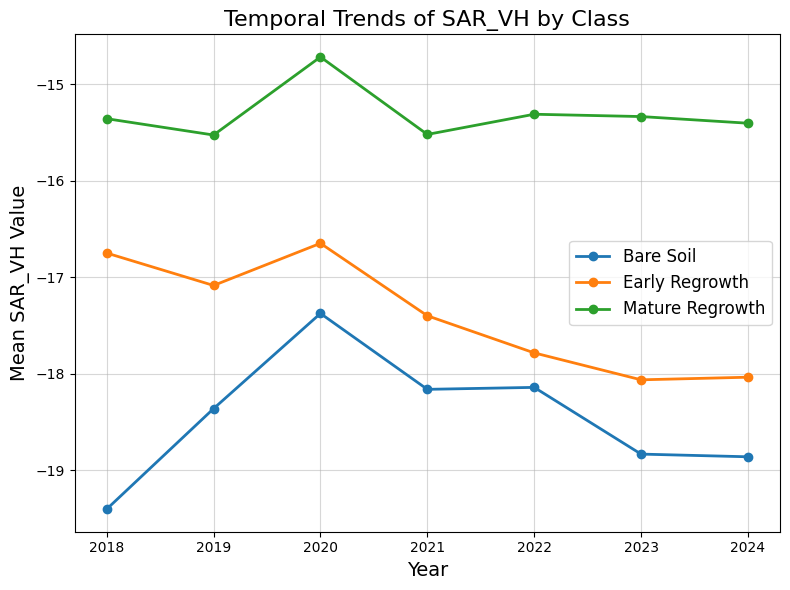

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import pandas as pd

# Load classified images for 2018 to 2024
class_images = {
    2018: "Forest_classes_2018.tif", 
    2019: "Forest_classes_2019.tif",
    2020: "Forest_classes_2020.tif", 
    2021: "Forest_classes_2021.tif",
    2022: "Forest_classes_2022.tif", 
    2023: "Forest_classes_2023.tif",
    2024: "Forest_classes_2024.tif"
}

# Load NDVI, NDWI, NBR, SAR_VV, SAR_VH images
indices = ["ndvi", "ndwi", "nbr", "sar_vv", "sar_vh"]
index_images = {
    2018: {index: f"{index}_2018.tif" for index in indices},
    2019: {index: f"{index}_2019.tif" for index in indices},
    2020: {index: f"{index}_2020.tif" for index in indices},
    2021: {index: f"{index}_2021.tif" for index in indices},
    2022: {index: f"{index}_2022.tif" for index in indices},
    2023: {index: f"{index}_2023.tif" for index in indices},
    2024: {index: f"{index}_2024.tif" for index in indices}
}

# Function to load raster images
def load_image(file_path):
    try:
        with rasterio.open(file_path) as src:
            return src.read(1)  # Read the first band
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

# Function to compute mean values for each class
def compute_class_stats(class_image, index_image):
    stats = {}
    for cls in [0, 1, 2]:  # Classes: 0 (Bare Soil), 1 (Early Regrowth), 2 (Mature Regrowth)
        mask = class_image == cls
        if np.sum(mask) == 0:  # Handle cases where no pixels are classified in this class
            stats[cls] = np.nan  # Assign NaN for missing data
        else:
            stats[cls] = np.mean(index_image[mask])  # Mean value for each class
    return stats

# Calculate mean values for each year and index
class_stats = {index: {year: {} for year in class_images} for index in indices}
for year in class_images:
    class_image = load_image(class_images[year])
    if class_image is None:
        continue  # Skip if the classified image is missing or failed to load
    for index in indices:
        index_image = load_image(index_images[year][index])
        if index_image is None:
            print(f"Missing data for {index} in year {year}")
            continue  # Skip if the index image is missing or failed to load
        class_stats[index][year] = compute_class_stats(class_image, index_image)

# Plot separate graphs for each index
for index in indices:
    plt.figure(figsize=(8, 6))
    for cls, label in zip([0, 1, 2], ["Bare Soil", "Early Regrowth", "Mature Regrowth"]):
        means = [
            class_stats[index][year].get(cls, np.nan) if year in class_stats[index] else np.nan
            for year in class_images
        ]
        plt.plot(
            list(class_images.keys()), means, label=f"{label}", marker='o', linestyle='-', linewidth=2
        )
    plt.xlabel("Year", fontsize=14)
    plt.ylabel(f"Mean {index.upper()} Value", fontsize=14)
    plt.title(f"Temporal Trends of {index.upper()} by Class", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.savefig(f"{index}_temporal_trends.png", dpi=300)  # Save each plot
    plt.show()


C:\Users\washaya\.conda\envs\snappy_new2\lib\site-packages\matplotlib\axes\_base.py:2985: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


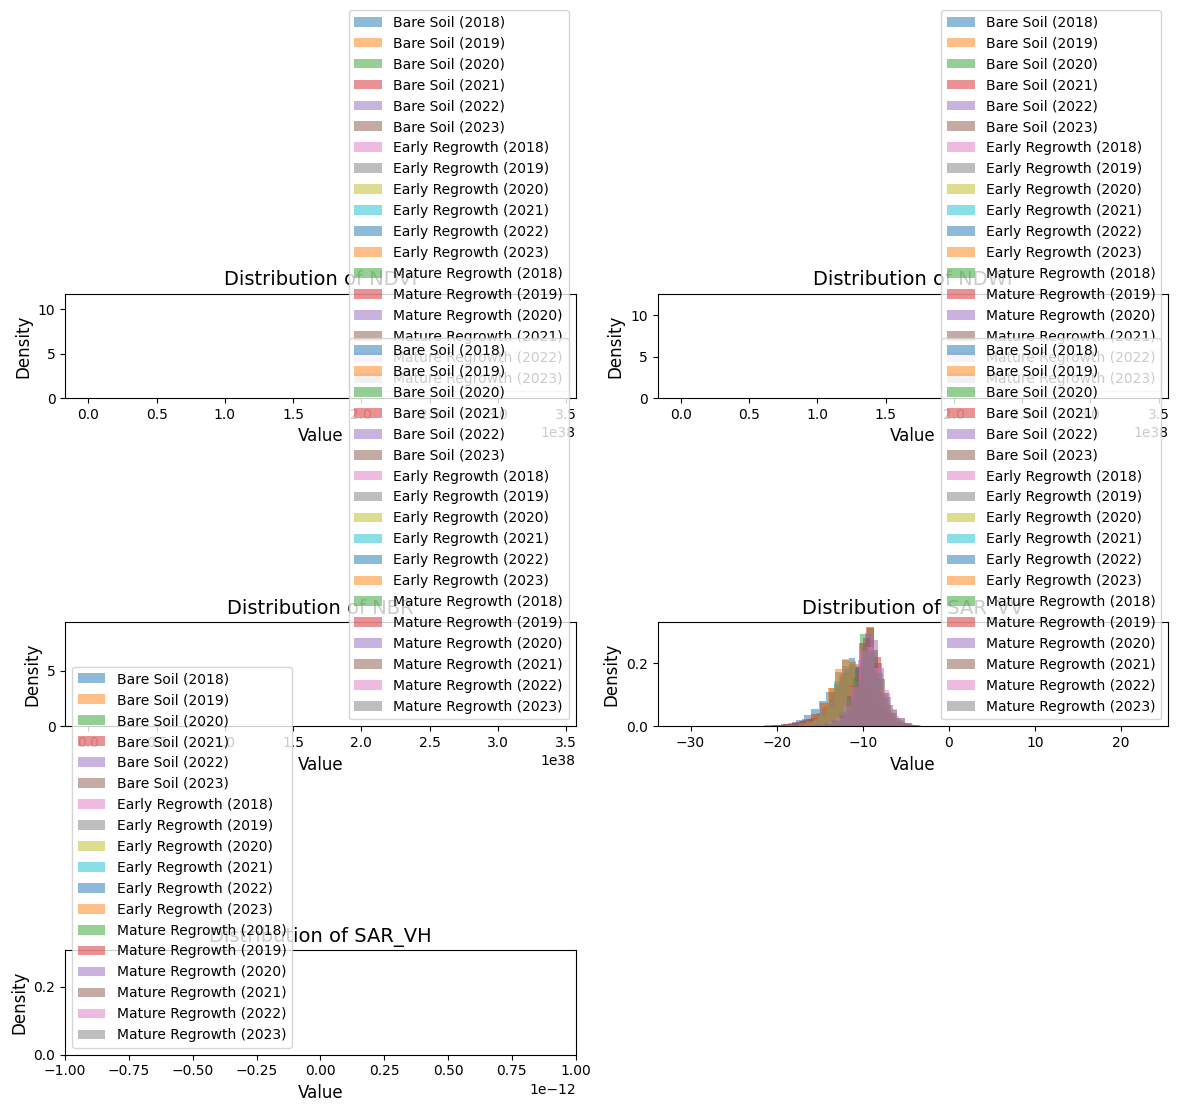

In [4]:
# Plot histograms of indices for each class
plt.figure(figsize=(12, 10))
for i, index in enumerate(indices):
    plt.subplot(3, 2, i + 1)
    for cls, label in zip([0, 1, 2], ["Bare Soil", "Early Regrowth", "Mature Regrowth"]):
        for year in class_images:
            class_image = load_image(class_images[year])
            index_image = load_image(index_images[year][index])
            values = index_image[class_image == cls]
            plt.hist(values, bins=50, alpha=0.5, label=f"{label} ({year})", density=True)
    plt.title(f"Distribution of {index.upper()}", fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig("index_distributions.png", dpi=300)
plt.show()
